In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import wave
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os

In [ ]:
path = '/content/drive/MyDrive/Datasets/genres/blues/blues.00000.wav'

file = wave.open(path)
song = file.readframes(-1)
song = np.frombuffer(song, dtype='int16')
song = song.astype('float64')

# Mel-frequency cepstrum
It's a representation of the short term power spectrum. Mel-frequency cepstral coefficients are coefficients that collectively make up an MFC. A type of cepstrum (non-linear spectrum-of-a-spectrum).

The difference beween a standard cepstrum and a MFC is stat in the latter the frequency bands are equally spaced on the mel scale, which approximates the human's auditory system's response more than the linearly spaced frequency bands used in the normal spectrum.

MFCCs are commonly derived as follows...
1. Take the *Fourier Transform* of a windowed excerpt of the signal
2. Map the powers of the spectrum obtained above onto the mel scale using overlapping windows
3. Take the log
4. Apply the Discrete Cosine Transform
5. The MFCCs are the amplitudes of the resulting spectrum

To derive the MFCCs we used librosa.feature, a python library commonly used for audio processing. The first 13 coefficients for each windowed signal are extracted, as they should contain most of the relevant information. The coefficients are calculated at periodic time interval, so we will only store the average over the whole signal for each coefficient. To get more features out of the computation, for each coefficient we will also store the absolute value of the first and second order derivatives of the MFCCs.

### Example:

In [ ]:
mfccs = librosa.feature.mfcc(song, sr=22050, n_mfcc=20)

In [ ]:
mfccs_mean = np.mean(mfccs, axis=1)

mfccs_delta = librosa.feature.delta(mfccs)
mfccs_delta2 = librosa.feature.delta(mfccs, order=2)

mfccs_delta_mean = np.mean(mfccs_delta, axis=1)
mfccs_delta2_mean = np.mean(mfccs_delta2, axis=1)

### Visualization of MFCCs

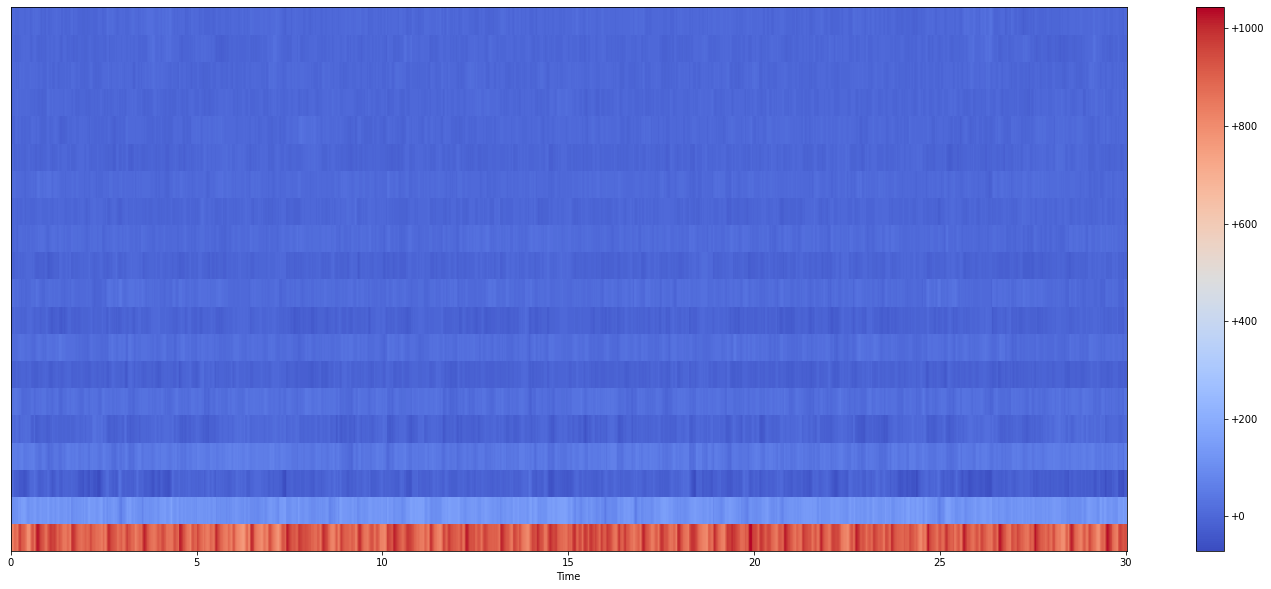

In [ ]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs, x_axis="time", sr=22050)
plt.colorbar(format="%+2.f")
plt.show()

### Visualization of MFCCs first derivative

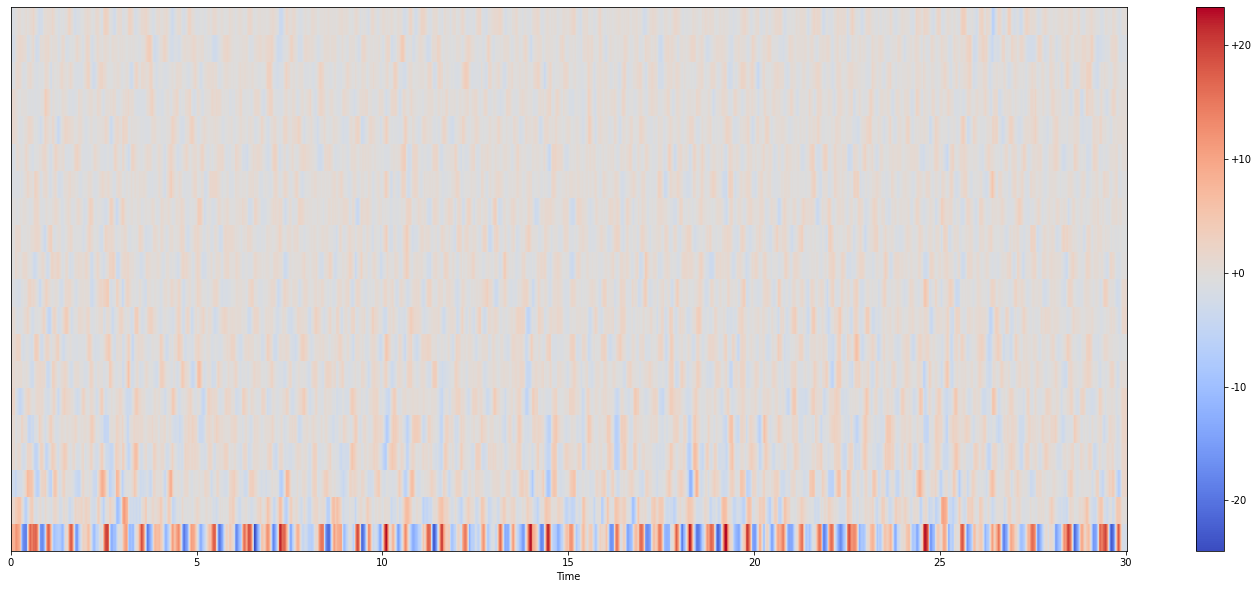

In [ ]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs_delta, x_axis="time", sr=22050)
plt.colorbar(format="%+2.f")
plt.show()

### Visualization of MFCCs second derivative

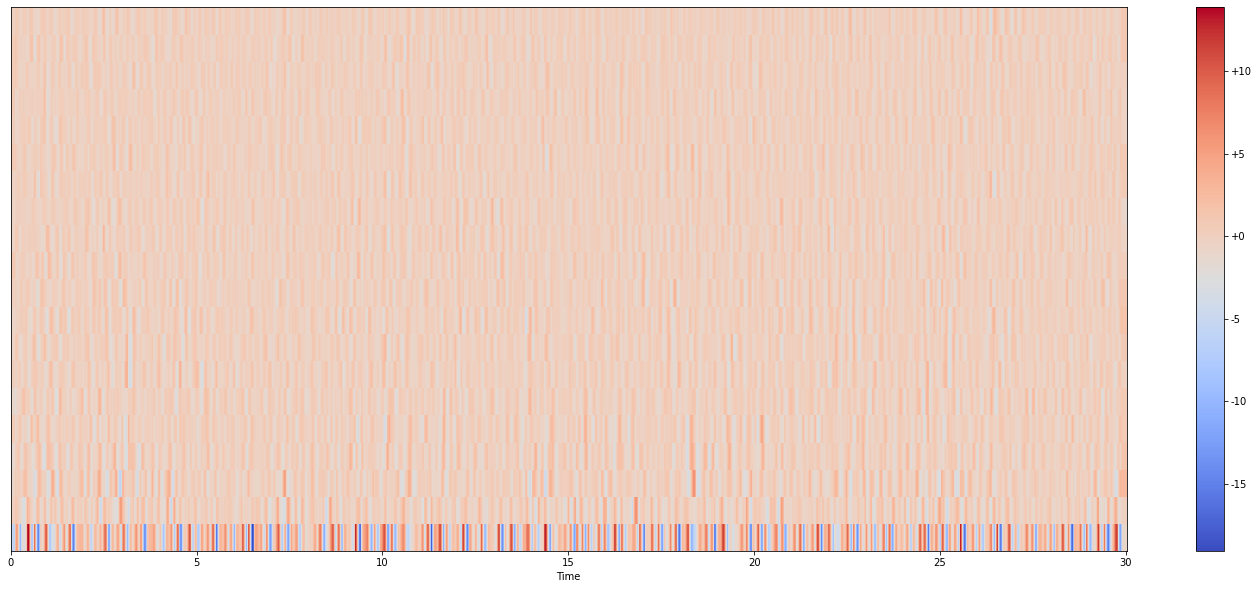

In [ ]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs_delta2, x_axis="time", sr=22050)
plt.colorbar(format="%+2.f")
plt.show()

# Complete Feature Extraction Loop

In [ ]:
def extract_mfcc_features(signal):
  mfccs = librosa.feature.mfcc(signal, sr=22050, n_mfcc=13)

  num_windows = mfccs.shape[1]
  random_sample_index = np.random.choice(num_windows, 1)[0]

  mfccs_delta = librosa.feature.delta(mfccs)
  mfccs_delta2 = librosa.feature.delta(mfccs, order=2)

  feature_list = list()
  feature_list.extend(mfccs[:,random_sample_index].T.tolist())
  feature_list.extend(mfccs_delta[:,random_sample_index].T.tolist())
  feature_list.extend(mfccs_delta2[:,random_sample_index].T.tolist())
  return feature_list

In [ ]:
path = "./drive/MyDrive/Datasets/genres/"

featurelist = list()
for root, dir, files in os.walk(path):
    for k, genre in enumerate(sorted(dir)):
        print('Started genre {} ({})'.format(k, genre))
        for root2, dir2, tracks in os.walk(path + genre + '/'):
            for track in sorted(tracks):
                # Wav file decoding
                wav_file = wave.open(root2 + track, 'rb')
                signal = wav_file.readframes(-1)
                signal = np.frombuffer(signal, dtype='int16')
                signal = signal.astype('float64')
                wav_file.close()

                # Calculate MFCC features
                featurelist.extend(extract_mfcc_features(signal))
                featurelist.append(k) # Current class
                print('Working on track {}'.format(track))
        print('Ended genre {} ({})'.format(k, genre))
featurearr = np.array(featurelist).reshape(len(featurelist)//40, 40)

# Generate list of column names
column_names = list()

# MFCC means
for i in range(13):
  column_names.append('MFCC_{}'.format(i + 1))

# MFCC Delta1 means
for i in range(13):
  column_names.append('MFCC_DELTA1_{}'.format(i + 1))

# MFCC Delta2 means
for i in range(13):
  column_names.append('MFCC_DELTA2_{}'.format(i + 1))

column_names.append('CLASS')

df = pd.DataFrame(featurearr, columns=column_names)
df.to_csv('mfcc_dataset.csv')

Started genre 0 (blues)
Working on track blues.00000.wav
Working on track blues.00001.wav
Working on track blues.00002.wav
Working on track blues.00003.wav
Working on track blues.00004.wav
Working on track blues.00005.wav
Working on track blues.00006.wav
Working on track blues.00007.wav
Working on track blues.00008.wav
Working on track blues.00009.wav
Working on track blues.00010.wav
Working on track blues.00011.wav
Working on track blues.00012.wav
Working on track blues.00013.wav
Working on track blues.00014.wav
Working on track blues.00015.wav
Working on track blues.00016.wav
Working on track blues.00017.wav
Working on track blues.00018.wav
Working on track blues.00019.wav
Working on track blues.00020.wav
Working on track blues.00021.wav
Working on track blues.00022.wav
Working on track blues.00023.wav
Working on track blues.00024.wav
Working on track blues.00025.wav
Working on track blues.00026.wav
Working on track blues.00027.wav
Working on track blues.00028.wav
Working on track bl

In [ ]:
df.to_csv('mfcc_dataset.csv')